In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import scipy.stats  as st
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,auc,roc_auc_score,log_loss,ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder

In [2]:
dd = pd.read_csv(r"C:\Users\91824\Downloads\Placement_Data.csv")

In [3]:
dd[dd["salary"].isna()]['status'].unique()

array(['Not Placed'], dtype=object)

In [4]:
dd.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
dd.fillna(0, inplace=True)


In [6]:
dd.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [7]:
dd.duplicated().sum()

0

In [8]:
dd.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [9]:
dd.head(7)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0


In [10]:
dd['hsc_b']

0       Others
1       Others
2      Central
3      Central
4      Central
        ...   
210     Others
211     Others
212     Others
213     Others
214     Others
Name: hsc_b, Length: 215, dtype: object

In [11]:
dd['degree_p']

0      58.00
1      77.48
2      64.00
3      52.00
4      73.30
       ...  
210    77.60
211    72.00
212    73.00
213    58.00
214    53.00
Name: degree_p, Length: 215, dtype: float64

<Axes: xlabel='specialisation', ylabel='count'>

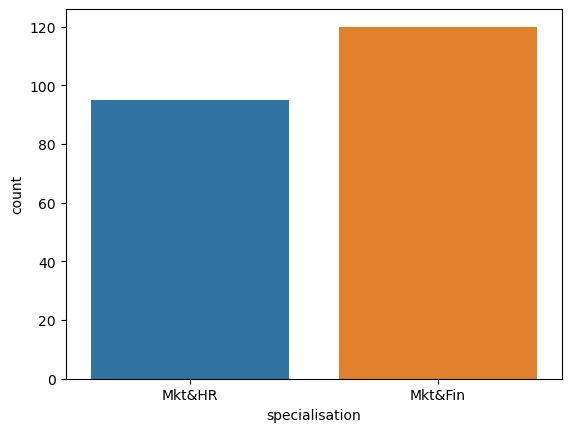

In [12]:
sns.countplot(data=dd,x='specialisation',label='salary')

In [13]:
X = dd.drop('status',axis=1)
y = dd['status']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=22,stratify = y)

In [15]:
cat_col=x_train.select_dtypes(include="object").columns
num_col=x_train.select_dtypes(exclude="object").columns


Or = OrdinalEncoder()
On = OneHotEncoder()

Or.fit(x_train)

In [16]:
cat_col

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation'],
      dtype='object')

In [17]:
num_col

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

Ord = Or.fit_transform(x_train)

Ord

In [18]:

ohe = OneHotEncoder(drop = 'first')
#transformed = ohe.fit_transform(dd[['ssc_b','gender','hsc_b','hsc_s','degree_t','workex','specialisation']])
#print(transformed.toarray())
ohe.fit_transform(x_train[cat_col])

<161x9 sparse matrix of type '<class 'numpy.float64'>'
	with 605 stored elements in Compressed Sparse Row format>

In [19]:
pd.DataFrame(ohe.fit_transform(x_train[cat_col]),index = x_train.index)

,0
124,"(0, 0)\t1.0\n (0, 4)\t1.0\n (0, 5)\t1.0\n ..."
104,"(0, 0)\t1.0\n (0, 2)\t1.0\n (0, 4)\t1.0\n ..."
4,"(0, 0)\t1.0\n (0, 3)\t1.0"
169,"(0, 0)\t1.0\n (0, 1)\t1.0\n (0, 2)\t1.0\n ..."
94,"(0, 0)\t1.0\n (0, 3)\t1.0"
...,...
88,"(0, 3)\t1.0\n (0, 8)\t1.0"
166,"(0, 0)\t1.0\n (0, 1)\t1.0\n (0, 2)\t1.0\n ..."
111,"(0, 0)\t1.0\n (0, 1)\t1.0\n (0, 2)\t1.0\n ..."
208,"(0, 2)\t1.0\n (0, 4)\t1.0\n (0, 8)\t1.0"


In [20]:
ohe.get_feature_names_out()

array(['gender_M', 'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Others', 'degree_t_Sci&Tech',
       'workex_Yes', 'specialisation_Mkt&HR'], dtype=object)

In [21]:
x_train = pd.get_dummies(x_train,columns = cat_col,drop_first = True)

In [22]:
x_test = pd.get_dummies(x_test,columns = cat_col,drop_first = True)

In [23]:
x_train

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
124,125,67.00,71.00,64.33,64.00,61.26,250000.0,1,0,0,0,1,1,0,1,1
104,105,69.00,63.00,65.00,55.00,58.23,360000.0,1,0,1,0,1,0,0,1,1
4,5,85.80,73.60,73.30,96.80,55.50,425000.0,1,0,0,1,0,0,0,0,0
169,170,59.96,42.16,61.26,54.48,65.48,0.0,1,1,1,0,1,0,1,0,1
94,95,58.00,62.00,64.00,53.88,54.97,260000.0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,66.00,62.00,73.00,58.00,64.36,210000.0,0,0,0,1,0,0,0,0,1
166,167,62.00,62.00,60.00,63.00,52.38,240000.0,1,1,1,1,0,0,0,1,1
111,112,51.00,54.00,61.00,60.00,60.64,0.0,1,1,1,0,1,0,1,0,1
208,209,43.00,60.00,65.00,92.66,62.92,0.0,0,0,1,0,1,0,0,0,1


In [24]:
x_test

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
51,52,54.40,61.12,56.20,67.00,62.65,0.0,1,0,0,1,0,0,0,0,1
89,90,84.00,75.00,69.00,62.00,62.36,210000.0,0,1,1,0,1,0,1,1,1
12,13,47.00,55.00,65.00,62.00,65.04,0.0,0,0,1,0,1,0,0,0,1
119,120,60.80,68.40,64.60,82.66,64.34,940000.0,1,0,0,1,0,0,0,1,0
42,43,49.00,39.00,65.00,63.00,51.21,0.0,1,1,0,0,1,1,0,0,0
134,135,77.44,92.00,72.00,94.00,67.13,250000.0,0,0,1,1,0,0,0,1,0
181,182,62.00,60.33,64.21,63.00,60.02,0.0,1,0,1,0,1,0,1,0,1
151,152,65.00,65.00,75.00,83.00,58.87,270000.0,1,0,0,1,0,0,0,0,0
126,127,79.00,61.00,75.50,70.00,68.20,210000.0,0,1,1,0,1,0,1,1,0
193,194,60.00,63.00,56.00,80.00,56.63,300000.0,0,0,0,0,0,1,0,1,1


### Model_Building

In [25]:
from mixed_naive_bayes import MixedNB

In [26]:
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)

In [27]:
y_test = le.transform(y_test)

In [28]:
mnb=MixedNB(categorical_features=[8,9,10,11,12,13,14,15])

In [29]:
x_train.columns

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender_M', 'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR'],
      dtype='object')

In [30]:
mnb

MixedNB(alpha=0.5, var_smoothing=1e-09)

In [31]:
mnb.fit(x_train,y_train)

MixedNB(alpha=0.5, var_smoothing=1e-09)

In [32]:
y_pred = mnb.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred)

1.0

In [34]:
confusion_matrix(y_test,y_pred)

array([[17,  0],
       [ 0, 37]], dtype=int64)

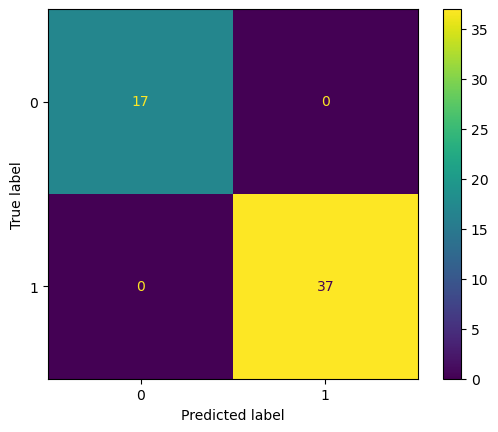

In [35]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        37

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

